# Project Dashboard Mk 3

Goals:

1. Polish up each dashboard
    - Add style
    - Add legends
    - Etc.
    - Also, fix bugs :)
2. Multi-page it for final release
3. Make video, upload
4. Go onto campus and confirm it works
4. (Also, redo reviews.)

In [1]:
print("Starting up!")
print("... Importing")
# Common imports from Python standard libraries
from dataclasses import dataclass
import math

# Common imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

# Science imports
import scipy
from scipy import stats
from scipy import cluster
from statistics import mean
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from matplotlib import colors

# Useful imports for visualization
from plotly import subplots

# Plotly express and dash
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff




# Constants
EPS = 0.0000001
FINAL = False

# Some useful functions
def almost_equal(a,b,eps=EPS):
    return abs(a-b) <= eps

def binsearch(func, vv = 0.025, x_l = -100, x_r = 100, eps=0.00001):
    '''
    Search for x such that func(x) == vv,
    within a range of +- eps,
    with x between x_l and x_r.
    '''
    v_l = func(x_l)
    v_r = func(x_r)
    
    x_m = (x_l + x_r)/2
    v_m = func(x_m)
    
    while abs(v_m - vv) >= eps:
        if v_m < vv:
            x_l = x_m
        elif v_m > vv:
            x_r = x_m
        else:
            print("weird, this shouldn't be possible")
            return x_m
            
        v_l = func(x_l)
        v_r = func(x_r)
        x_m = (x_l + x_r)/2
        v_m = func(x_m)
    
    return x_m

# Code provided from HW4
def stdev(X):
    m = mean(X)
    return math.sqrt(sum((x-m)**2 for x in X) / len(X))

def degreesOfFreedom(X, Y):
    s1 = (stdev(X)**2)
    s2 = (stdev(Y)**2)
    df = (s1 / len(X) + s2 / len(Y))**2 / ((s1 / len(X))**2 / (len(X) - 1) + (s2 / len(Y))**2 /
(len(Y) - 1))
    return(df)

# # Things for part 5
FI = (1 + 5**.5)/2 # golden ratio

def get_hues(ii):
    hue = (FI * ii) % 1
    hue_int = round(hue * 255)
    return f"hsv({hue_int},255,128)"

def get_sample(array, n_samples = 15161):
    indices = np.random.choice(list(range(len(array))), size=n_samples)
    return array[indices]


df_full = pd.read_csv("../DATASETS/US_Accidents_Dec20_updated.csv")
df = df_full.sample(n = 10000, ignore_index = True)

---
---

## (1) Boxplots, Violin Plots

Let's use these to understand the **distance** of the accidents, and how it relates to these keys:

1. 'Stop'
2. 'Traffic_Calming'
3. 'Roundabout'
4. 'Traffic_Signal'


In [26]:
print("Building part 1...")

dist_checklist_keys = ['Stop', 'Traffic_Calming', 'Roundabout', 'Traffic_Signal', 'Crossing', 'Railway', 'Bump']
distance_by_severity = {severity : np.array(df[df['Severity'] == severity]['Distance(mi)']) for severity in set(df['Severity'])}

app = dash.Dash(name="Distance by different traffic conditions")

part_1_severity = html.Div(
    [
        html.Br(),
        html.Div(
            [
                html.Br(),
                html.H2("Part 1: Explore how traffic controls mitigate the impact of a road accident."),
                html.P('''
Some accidents are minor, such as a fender bender in a parking lot.
Other accidents are more severe, and can cause stretches of road to be left unsuitable for driving.

This dataset provides insight into the <b>distance</b> of impacted road, in miles, of different accidents.
Using this data, we can get insight into how the presence of road controls (such as stop signs)
impact the severity of accidents.

Explore the relation between the <b>distance</b> of road impacted by an accident and the <b>presence of traffic controls.</b>

Satisfies: Box plot, violin plots, statistics.
'''),
                dcc.Checklist(
                    id = "severity-checklist",
                    options = [{'value' : str(x), 'label' : f'{str(x)}'}
                               for x in dist_checklist_keys],
                               #for x in [1, 2, 3, 4]],
                    value   = [],
                    labelStyle = {'display' : 'inline-block'}
                ),
                dcc.Graph(id = "severity-distance-boxplot")
            ]
        ),
        html.Br(),

    ]
)


@app.callback(
    Output("severity-distance-boxplot", "figure"), 
    [Input("severity-checklist", "value")]
)
def part_1_figure(x):
    fig = px.violin(
        df,
        x = x,
        y = 'Distance(mi)',
        box = True,
        points='all'
    )
    return fig

app.layout = part_1_severity
app.run_server(port = 10001, debug=False)

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

 * Serving Flask app 'Distance by different traffic conditions' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:10001/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Dec/2021 16:11:55] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 16:11:55] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 16:11:55] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 16:11:55] "GET /_favicon.ico?v=2.0.0 HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 16:11:55] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 16:11:55] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 16:11:56] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 16:11:58] "POST /_dash-update-component HTTP/1.1" 200 -


---
---

## (2) Histogram and KDE estimation

Let's do **KDE and Histogram** now.

How present are the following weather conditions in traffic accidents?



In [27]:
print("Building part 2...")

weather_keys = ['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

app = dash.Dash(name="Weather conditions and traffic accidents")
part_2_histogram = html.Div(
    [
        html.Br(),
        html.Div(
            [
                html.H2("Part 2: Explore weather conditions and traffic accidents."),
                html.P('''
A foggy day, a rainy night, and frozen roads. Inclement weather impacts driving conditions.

Explore the distribution of different weather conditions during traffic accidents.
Does anything seem surprising when you choose different labels and bin sizes?

Satisfies: Kernel Density Estimation, Histogram, Statistics, Correlation Analysis.
                '''),
            ]
        ),
        html.Div(
            [
                dcc.Graph(id = "weather-kde"),
                dcc.Checklist(
                    id = "weather-checklist",
                    options = [
                        {'value' : str(x), 'label' : f'{str(x)}'}
                        for x in weather_keys
                    ],
                    value   = ["Temperature(F)"],
                    labelStyle = {'display' : 'inline-block'}
                ),
                dcc.Slider(
                    id="weather-binsize",
                    min=0.1,
                    max=10.1,
                    value=1.0, 
                    step = 0.1,
                    marks = {
                        x : str(x) 
                        for x in [0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0]
                    }
                )
            ]
        ),
        html.Br(),    
    ]
)


@app.callback(
    Output("weather-kde", "figure"), 
    [Input("weather-checklist", "value"),
     Input("weather-binsize", "value")
    ]
)
def part_2_figure(labels, binsize):
    '''
    fig = px.histogram(
        df,
        x = x,
        #marginal = 'violin',
        histnorm = 'probability density',
        nbins = bins
    )
    return fig
    '''
    data = np.nan_to_num(np.array(df[labels]), copy=True, nan=0.0, posinf=0.0, neginf=0.0).T
    fig = ff.create_distplot(data, labels, bin_size=binsize)
    return fig


app.layout = part_2_histogram
app.run_server(port = 10001, debug=False)

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

 * Serving Flask app 'Weather conditions and traffic accidents' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:10001/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Dec/2021 16:12:09] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 16:12:10] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 16:12:10] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 16:12:10] "GET /_favicon.ico?v=2.0.0 HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 16:12:10] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 16:12:10] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 16:12:10] "GET /_dash-component-suites/dash/dcc/async-slider.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 16:12:10] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 16:12:17] "POST /_dash-update-component HTTP/1.1" 200 -


---
---


## (3) Hypothesis Testing


Let's do a t-test against this null hypothesis: **The presence of stop signs have no impact on the distance of an accident.**

In [86]:
print("Building part 3...")

test_keys = ['Stop', 'Crossing', 'Traffic_Calming', 'Traffic_Signal']
test_metrics = ['Distance(mi)', 'Severity']

app = dash.Dash(name="Hypothesis testing")

part_3_hypothesis = html.Div(
    [
        html.Br(),
        html.Div(
            [
                html.H2("Part 3: Hypothesis testing"),
                html.P('''
Think back to Part 1, and consider this null hypothesis:
"There is no difference in the distance (or severity) of traffic accidents for those
which occur at stop signs and those which do not."

Intuitively, you might reject this null hypothesis, but with this modal, you can check and be sure.

Assuming alpha = 0.05, explore eight total combinations of hypotheses.
The respective T-scores and P-values are printed.

Satisfies: t-test, p-value, hypothesis testing, box-plot, histogram, kernel density estimation
                '''),
            ]
        ),
        html.Div(
            [
                dcc.Graph(id = "hypothesis-graph"),
                dcc.RadioItems(
                    id = "hypothesis-keys",
                    options = [
                        {'value' : x, 'label' : f"Test how '{x}' ..."}
                        for x in test_keys
                    ],
                    value = "Stop",
                    labelStyle = {'display' : 'inline-block'}
                ),
                dcc.RadioItems(
                    id = "hypothesis-metric",
                    options = [
                        {'value' : x, 'label' : f"... impacts metric '{x}'"}
                        for x in test_metrics
                    ],
                    value = "Distance(mi)",
                    labelStyle = {'display' : 'inline-block'}
                )
            ]
        ),
        html.Br(),
    ]
)


@app.callback(
    Output("hypothesis-graph", "figure"), 
    [Input("hypothesis-keys", "value"),
     Input("hypothesis-metric", "value")
    ]
)
def part_3_figure(key = 'Stop', metric = 'Distance(mi)', show_boxes=True):
    # From our dataframe, get items with and without boolean key
    key_with = df[df[key] == True][metric]
    key_without = df[df[key] == False][metric]

    # get degrees of freedom
    v_obs = degreesOfFreedom(key_with, key_without)
    # Get the t-pdf of our two values
    pdf_with = lambda x: stats.t.pdf(
        x, df = v_obs, loc = key_with.mean(), scale = key_with.std()
    )
    pdf_without = lambda x: stats.t.pdf(
        x, df = v_obs, loc = key_without.mean(), scale = key_without.std()
    )
    # get statistics
    t_obs, p_obs = scipy.stats.ttest_ind(key_with, key_without)

    # Lines for graphing
    Xs = np.linspace(-8, 8, 1000)
    Ys_with = [pdf_with(x) for x in Xs]
    Ys_without = [pdf_without(x) for x in Xs]

    # Create figures
    fig = go.Figure()
    fig.add_trace(
        go.Scatter(x=Xs, y=Ys_with, mode='lines', name=f"With {key}")
    )
    fig.add_trace(
        go.Scatter(x=Xs, y=Ys_without, mode='lines', name=f"Without {key}")
    )
    # Add text
    fig.add_trace(
        go.Scatter(
            x = [0],
            y = [0.50],
            text = [f"T-stat: {t_obs:.3f}    P-score: {p_obs:.3f}"],
            mode = "text",
            name = "Stats"
        )
    )
    
    if show_boxes:
        fig.add_trace(
            go.Box(x=key_with, name=f"Boxplot accidents with {key}")
        )
        fig.add_trace(
            go.Box(x=key_without, name=f"Boxplot  accidents without {key}")
        )
    
    return fig

app.layout = part_3_hypothesis
app.run_server(port = 10001, debug=False)

Building part 3...
Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

 * Serving Flask app 'Hypothesis testing' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:10001/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Dec/2021 18:04:49] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 18:04:49] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 18:04:49] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 18:04:49] "GET /_favicon.ico?v=2.0.0 HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 18:04:49] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 18:04:49] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 18:04:49] "POST /_dash-update-component HTTP/1.1" 200 -


---

---


## (4) Cartogram map

This one is simple: Let's plot all the accidents by lat-lon, along with state shapes. Let users explore.

In [29]:
print("Building part 4...")

app = dash.Dash(name="Map")

part_4_map = html.Div(
    [
        html.Div(
            [
                html.H2("Part 4: Map of accidents by severity"),
                html.P('''
The dataset labels accidents by the severity of the imapct it has on traffic,
on a scale of 1 (not severe) to 4 (most severe). Explore the distribution of
severity of these accidents here, and how they relate with different traffic measures.

Satisfies: Cartogram map, geospatial analysis
                '''),
            ]
        ),
        html.Div(
            [
                dcc.Graph(id = "accidents-map"),
                dcc.RadioItems(
                    id = "map-severity",
                    options = [{'value' : x, 'label' : f"Severity {x}"}
                               for x in [1,2,3,4]],
                    value = 1,
                    labelStyle = {'display' : 'inline-block'}
                ),
                dcc.RadioItems(
                    id = "severity-checklist-map",
                    options = [{'value' : str(x), 'label' : f'{str(x)}'}
                               for x in ['Any'] + dist_checklist_keys],
                    value   = 'Any',
                    labelStyle = {'display' : 'inline-block'}
                ),
            ]
        )
                
    ]
)

@app.callback(
    Output("accidents-map", "figure"), 
    [Input("map-severity", "value"),
     Input("severity-checklist-map", "value"),
    ]
)
def part_4_figure(severity = [1], traffic_measure = 'Any'):
    colors = [
        'rgba(0,0,0,0)',
        'rgba(0,128,192,192)',
        'rgba(128,0,192,192)',
        'rgba(256,0,128,192)', 
        'rgba(256,128,0,192)'
    ]
    
    if traffic_measure == 'Any':
        df_subset = df[df['Severity'] == severity]
    else:
        df_subset = df[df['Severity'] == severity][df[traffic_measure] == True]
    
    color_str = colors[severity]
    color = [color_str for _ in range(len(df_subset))]
    
    fig = go.Figure(
        data = go.Scattergeo(
            lat=df_subset['Start_Lat'],
            lon=df_subset['Start_Lng'],
            marker_color = color,
            marker_size = 4,
        )
    )
    
    fig.update_layout(geo_scope='usa')
    
    return fig

app.layout = part_4_map
app.run_server(port = 10001, debug=False)

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

 * Serving Flask app 'Map' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:10001/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Dec/2021 16:15:33] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 16:15:33] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 16:15:33] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 16:15:33] "GET /_favicon.ico?v=2.0.0 HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 16:15:33] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 16:15:33] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 16:15:33] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 16:15:38] "POST /_dash-update-component HTTP/1.1" 200 -
/tmp/ipykernel_22041/4117929602.py:58: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

127.0.0.1 - - [12/Dec/2021 16:15:39] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 16:15:40] "POST /_dash-update-component H

With this map, we have (weakly) cartogram and network analysis.

I think the remaining steps are as follows:

1. Repeat this map with clustering
2. (Maybe show hierarchy analysis?)
3. Correlation magic modal:
    - User selects any X and Y keys
    - Plots scatter, regression fit line, with pearson correlation coefficient

And of course, skip word cloud / bar plot.

---
---



## (5) Clustering

Here is what is left:

- Clustering
    - Hierarchical
    - K-Means
- Gaussian Mixture Model (classification)
- Correlation Analysis:
    - Linear regression
    - Pearson correlation
- NLP / text mining:
    - Word cloud
    - Bar plot
- Basics:
    - Line graph

In [49]:
print("Preparing part 5...")

K_CLUSTERS = 12
hues = [get_hues(ii) for ii in range(300)]
all_geo_data = np.array([df_full["Start_Lng"], df_full["Start_Lat"]]).T
some_geo_data = np.array([df["Start_Lng"], df["Start_Lat"]]).T

print("... fitting for part 5...")
gmm = GaussianMixture(n_components = K_CLUSTERS)
gmm.fit(get_sample(all_geo_data, 200_000))

GaussianMixture(n_components=12)

In [74]:
print("... generating part 5 figure...")

part_5_labels = gmm.predict(some_geo_data)
part_5_colors = [hues[index] for index in part_5_labels]

def part_5_figure():
    fig = go.Figure(
            data = go.Scattergeo(
                lat=df['Start_Lat'],
                lon=df['Start_Lng'],
                marker_color = part_5_colors,
                marker_size = 2,
            )
        )
    fig.update_layout(geo_scope='usa')
    return fig


In [84]:
print("... building part 5...")

app = dash.Dash(name="Accident clustering through GMM")

part_5_map = html.Div(
    [
        html.Br(),
        html.Div(
            [
                html.H2("Part 5: Accident clustering"),
                html.P('''
This modal plots the same map as above, but now with all points clustered according to location.

This uses a 12-class Gaussian Mixture Model.

Satisfies: Gaussian mixture model, classification, clustering.

<i>Note that we skip K-Means and hierarchical clustering,
since it is too intensive to display, even on this subset of 10000 points.</i>
                '''),
                dcc.Graph(id = "clustered-map", figure = part_5_figure())
            ]
        ),
        html.Br()
    ]
)

app.layout = part_5_map
app.run_server(port = 10001, debug=False)

Building part 5...
Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

 * Serving Flask app 'Accident clustering through GMM' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:10001/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Dec/2021 17:59:31] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 17:59:31] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 17:59:31] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 17:59:31] "GET /_favicon.ico?v=2.0.0 HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 17:59:31] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 17:59:31] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -


## (...) More Clustering

Here is what is left:

- Clustering
    - Hierarchical
    - K-Means
- Correlation Analysis:
    - Linear regression
    - Pearson correlation
- Skipping:
    - NLP / text mining:
        - Word cloud
    - Bar plot
- Basics:
    - Line graph

In [116]:
'''
cluster_keys = [
    'Stop', 'Crossing', 'Traffic_Calming', 'Traffic_Signal',
    'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
    'Wind_Speed(mph)', 'Precipitation(in)'
]

cluster_df = df[cluster_keys].copy()

cluster_df = cluster_df.replace(
    [False, True, -np.inf, np.inf, np.nan],
    [0.00,  1.00,  0.0,  0.0,  0.0]
)

cluster_ar = np.array(cluster_df)
# 10000 observations, 10 values

clustering = cluster.hierarchy.ward(cluster_ar)
'''

# (7) Lines and correlation

In this, we'll use Pearson correlation, regression, and line graphs.


Here is what is left:

- Basics:
    - Line graph
- Correlation Analysis:
    - Linear regression
    - Pearson correlation
- Skipping:
    - NLP / text mining:
        - Word cloud
    - Bar plot
    - Clustering
        - Hierarchical
        - K-Means


Goals: 
1. Let users pick any two keys to plot
2. Let users pick a regression power (2, 3, 4, 5) to fit to.
3. Print Pearsson correlation

In [ ]:
print("Preparing part 6...")
df_real = df.copy().replace(
    [False, True, -np.inf, np.inf, np.nan],
    [0.00,  1.00,  0.0,  0.0,  0.0]
)

axis_keys = [
    'Distance(mi)', 'Severity',
    'Stop', 'Crossing', 'Traffic_Calming', 'Traffic_Signal',
    'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)','Wind_Speed(mph)', 'Precipitation(in)',
    
]

In [189]:
print("... Defining part 6 figure...")

def eval_polyfit(xx, coefs):
    '''
    For given x, and coefficients from np.polynomial.polynomial.polyfit(X,Y)
    '''
    s = 0
    for ii, coef in enumerate(coefs):
        s += xx**ii * coef
    
    return s

def get_polyfit_points(
    dataframe = df_real, xkey = 'Stop', ykey = 'Distance(mi)', deg = 3
):
    # 1. Get coefficients 
    polyfit = np.polynomial.polynomial.polyfit(
        dataframe[xkey],
        dataframe[ykey],
        deg = deg
    )
    
    # 2. Get Xrange
    Xs = np.linspace(dataframe[xkey].min(), dataframe[xkey].max(), 1000)
    
    # 3. Get Ys
    Ys = [eval_polyfit(xx, polyfit) for xx in Xs]
    
    return Xs, Ys, polyfit
    
    

... Defining part 6 figure...


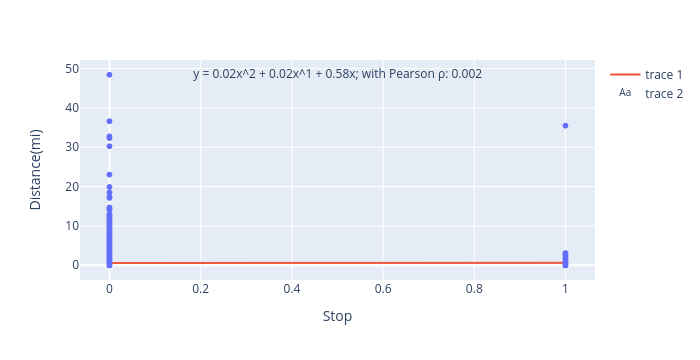

In [219]:
# WIP to define get_figure_part6
dataframe = df_real
xkey = 'Stop'
ykey = 'Distance(mi)'
deg = 2

# 1. Plot scattering of points
fig = px.scatter(dataframe, xkey, ykey) #go.Figure()

# 2. Plot fit
Xs, Ys, coefs = get_polyfit_points(dataframe, xkey, ykey, deg = deg)
fig.add_trace(
    go.Scatter(x = Xs, y = Ys, mode='lines')
)

# 3. Get Pearson correlation
pcc = np.corrcoef(dataframe[xkey], dataframe[ykey])[0,1]

# 4. Plot coefficients and correlation
midpoint_idx = len(Xs)//2

funcstr = "y = "
power   = len(coefs) - 1
for coef in coefs[::-1]:
    funcstr = funcstr + str(np.round(coef, 2)) + "x^" + str(power) + " + "
    power = power - 1

funcstr = funcstr[:-5] # remove '^0 + '

fig.add_trace(
    go.Scatter(
        x = [Xs[midpoint_idx],],
        y = [dataframe[ykey].max()] ,
        text = [funcstr + f"; with Pearson ρ: {pcc:.3f}",],
        mode = "text"
    )
)

fig.show()

In [176]:

def get_figure_part6(
    dataframe = df_real, xkey = 'Stop', ykey = 'Distance(mi)', deg = 3
):
    pass

array([0.57799302, 0.01060685, 0.01060685, 0.01060685])

In [141]:


part_6_fitting = html.Div(
    [
        html.Br(),
        html.Div(
            [
                html.H2("Final part: Arbitrary regressions"),
                html.P('''
In this final modal, please explore combinations of all the data items.
This modal will allow you to scatter (along X and Y axes) any two items from the dataset.

This modal also includes regression fitting, with user-set exponent (linear, quadratic, etc.)

Satisfies: Line graph, basics, linear regression, pearson correlation, correlation analysis.
                '''),
                dcc.Graph(id="fitting-graph"),
                html.Div(
                    [
                        dcc.Dropdown(
                            id = 'fit-xaxis',
                            options = [
                                {'value' : x, 'label' : x}
                                for x in axis_keys
                            ],
                            value = 'Stop',
                        ),
                        dcc.Dropdown(
                            id = 'fit-yaxis',
                            options = [
                                {'value' : x, 'label' : x}
                                for x in axis_keys
                            ],
                            value = 'Distance(mi)',
                        ),
                        dcc.Dropdown(
                            id = 'fit-exponent',
                            options = [
                                {'value' : 1, 'label' : "Linear (x¹)"},
                                {'value' : 2, 'label' : "Quadratic (x²)"},
                                {'value' : 3, 'label' : "Cubic (x³)"},
                                {'value' : 4, 'label' : "... (x⁴)"},
                                {'value' : 5, 'label' : "... (x⁵)"}
                            ],
                            value = 1,
                        ),
                    ],
                    style={'width': '15%', 'display': 'inline-block', 'vertical-align': 'right'}
                )
            ]
        ),
        html.Br()
    ]
)

@app.callback(
    Output("fitting-graph", "figure"),
    [
        Input("fit-xaxis", "value"),
        Input("fit-yaxis", "value"),
        Input("fit-exponent", "value"),
    ]
)
def get_figure_part6():
    pass


app.layout = part_6_fitting
app.run_server(port = 10001, debug=False)

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

Dash is running on http://127.0.0.1:10001/

 * Serving Flask app 'Hypothesis testing' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:10001/ (Press CTRL+C to quit)
127.0.0.1 - - [12/Dec/2021 19:16:08] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 19:16:08] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 19:16:08] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 19:16:08] "GET /_favicon.ico?v=2.0.0 HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 19:16:08] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 19:16:08] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [12/Dec/2021 19:16:08] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -


In [ ]:
Div